In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [7]:
df = pd.read_csv("IRIS.csv")  # Make sure this file has header: sepal_length, sepal_width, petal_length, petal_width, species

In [30]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])  # setosa=0, versicolor=1, virginica=2


In [11]:
# Encode labels
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [14]:
# Features and targets
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [20]:
# === Define model manually (2-layer NN) ===
class TwoLayerNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = torch.randn(input_size, hidden_size, requires_grad=True, dtype=torch.float32)
        self.b1 = torch.zeros(hidden_size, requires_grad=True, dtype=torch.float32)
        self.W2 = torch.randn(hidden_size, output_size, requires_grad=True, dtype=torch.float32)
        self.b2 = torch.zeros(output_size, requires_grad=True, dtype=torch.float32)

    def forward(self, x):
        self.z1 = x @ self.W1 + self.b1
        self.a1 = torch.relu(self.z1)
        self.z2 = self.a1 @ self.W2 + self.b2
        return self.z2

    def parameters(self):
        return [self.W1, self.b1, self.W2, self.b2]


In [22]:
# === Hyperparameters ===
input_size = 4
hidden_size = 16
output_size = 3
learning_rate = 0.01
epochs = 50

In [24]:
# Model, loss, optimizer
model = TwoLayerNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

Epoch [10/50] - Loss: 2.0271 - Train Acc: 0.3417 - Test Acc: 0.4000
Epoch [20/50] - Loss: 0.9021 - Train Acc: 0.5833 - Test Acc: 0.6000
Epoch [30/50] - Loss: 0.6655 - Train Acc: 0.6500 - Test Acc: 0.6333
Epoch [40/50] - Loss: 0.5627 - Train Acc: 0.7583 - Test Acc: 0.7000
Epoch [50/50] - Loss: 0.5027 - Train Acc: 0.7917 - Test Acc: 0.7333


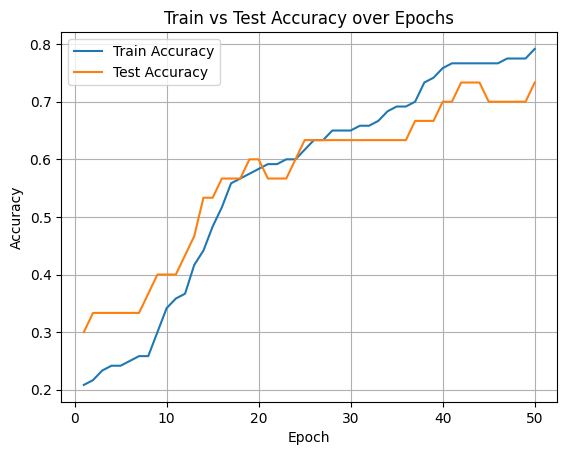

In [26]:
# === Training Loop ===
train_acc_list = []
test_acc_list = []

for epoch in range(epochs):
    # Forward
    logits = model.forward(X_train)
    loss = criterion(logits, y_train)

    # Backward
    loss.backward()

    # Update
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
            param.grad.zero_()

    # Accuracy (train)
    train_preds = torch.argmax(model.forward(X_train), dim=1)
    train_acc = (train_preds == y_train).float().mean().item()

    # Accuracy (test)
    test_preds = torch.argmax(model.forward(X_test), dim=1)
    test_acc = (test_preds == y_test).float().mean().item()

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {loss.item():.4f} - Train Acc: {train_acc:.4f} - Test Acc: {test_acc:.4f}")

# === Plotting ===
plt.plot(range(1, epochs + 1), train_acc_list, label="Train Accuracy")
plt.plot(range(1, epochs + 1), test_acc_list, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy over Epochs")
plt.legend()
plt.grid(True)
plt.show()